In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from dchisq import DChiSq

In [ ]:
# Linear scaling regime

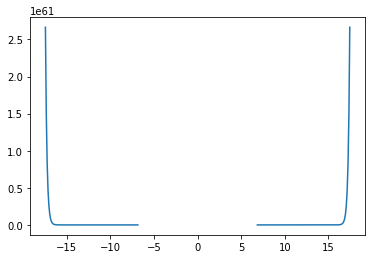

In [13]:
# Plot the PDF of the distribution 

# Parameters
p = np.array([250, 500, 1000, 2000, 5000, 10000])
T = 0.25 * p
n = p
sigma_sq = 0.25
gamma_sq = 0.25


for i, p_ in enumerate(p):

    # Distribution object
    dx2 = DChiSq(gamma_sq, sigma_sq, n[i] - T[i], T[i])
        
    # Domain of evaluation:
    x = np.linspace(-50, 50, 1000)
    plt.plot(x, dx2.PDF(x))

In [ ]:
# Sublinear scaling regime